# <font color = 'blue'> Two Applications on PDB Files </font>

In this project, we work on two applications of PDB Files: 
- **Ramachandran plots:** Analysis of favorable and unfavorable dihedral angles on protein sidechains 
- **Visualizing proteins:** This is a small visualization of all atoms on protein 

*PDB files will be read by **BioPython**.In order to approach a directory, we need to import **os**. Also, we need to import **numpy** to work on arrays and **matplotlib** to work on plotting. We also run **matplotlib** to export plots into a new destop window.*

## <font color = 'blue'><sup>1,5</sup>Ramachandran plots </font>

*The defining code of <u> ramachandran(protein) </u> below is created by Dr. Charles Weiss, Department of Chemistry, Augustana University, ND. This code is used for extracting two arrays, including phi and psi angles.

### <font color = 'red'> A. Background </font>
Ramachandran plot is a plot of dihedral angles, including phi $\phi$ and psi $\psi$, which determine favorable conformations of proteins' sidechains. Moreover, these angles can change with respect to the binding of other factors such as ligands enzymes on the protein.<sup>2</sup> 

**Figure 1:** $\phi$ and $\psi$ angles rotation around the plane of proteins' sidechains <sup>3</sup>
<img src="angles.png" alt="Drawing" style="width: 500px;"/>

Phi and psi dihedral angles exist in every residue within a protein's sidechains in secondary structure <sup>1</sup>. As shown in figure 1, because of sp<sup>3</sup> orbitals, in each residue, $\phi $  angle is on the left side where C<sub>O</sub>NC<sub>$\alpha$</sub> are on the same plane; $\psi$ angle is on the right side where C<sub>$\alpha$</sub>C<sub>O</sub>N are on the same plane. With respect to $\psi$ plane, the $\phi$ plane rotates to make a $\phi$ angle, and vice versa.

**Figure 2:** Ramachandran plots includes both allowable and unallowable areas of dihedral angles.<sup>4</sup>
<img src="Ramachandran plot.jpg" alt="Drawing" style="width: 400px;"/>
The Ramachandran plot above is a sample for our resulting plots. The white area is extremely unfavorable regions where diheral angles clash each other. The stronger intensity of color indicates of higher favorable areas where protein conformations can flexibly form such as $\alpha$ helices and $\beta$ sheets. The proteins with higher outliers will have more plots in white areas, and vice versa.   


### <font color = 'red'> B. Procedure</font>
In this application, we will do Ramachandran plot of proteins with both high outliers and low outliers.
We include **Panda** library to tabulate the *DataFrame* of $\phi$ and $\psi$ arrays. In **BioPython**, we use module:

`Bio.PDB` 

to read PBD files and take out necessary data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, math
import Bio.PDB


In [2]:
'''This code are provided by Dr. Charles Weiss. There is a minor change in code when reading adding PDB name '''
def ramachandran(protein):
    PDB = protein #this was changed from original one (PDB= protein +'.PDB')
    protein_model = Bio.PDB.PDBParser().get_structure(protein, PDB)
    
    pp = Bio.PDB.PPBuilder().build_peptides(protein_model[0])
    peptides = []
    for x in pp:
        peptides.extend(x)
        
    for chain in protein_model[0]:
        polypeptide = Bio.PDB.PPBuilder().build_peptides(chain)
    
    phipsi_rad = []

    for pp in polypeptide:
        phipsi_rad.extend(pp.get_phi_psi_list())
    
    # convert radians to degrees    
    phipsi_deg = []

    for values in phipsi_rad:
        phi = values[0]
        psi = values[1]
    
        try:
            phi_deg = math.degrees(phi)
        except TypeError:
            phi_deg = phi
        
        try:
            psi_deg = math.degrees(psi)
        except TypeError:
            psi_deg = psi        
    
        phipsi_deg.append((phi_deg, psi_deg))
        
        
    phi = []
    psi = []

    for peptide in phipsi_deg:
        phi.append(peptide[0])
        psi.append(peptide[1])
    
    rama_results = pd.DataFrame({'phi': [x for x in phi],
                                 'psi': [x for x in psi]})
    
    return rama_results

/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12001.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12027.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 4490.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4876.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4877.
  PDBConstructionWarning)
/Us

/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16910.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16911.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16912.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16913.
  PDBConstructionWarning)
/Users/ndnguyen20/Applications/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17029.
  PDBConstructionWarning)


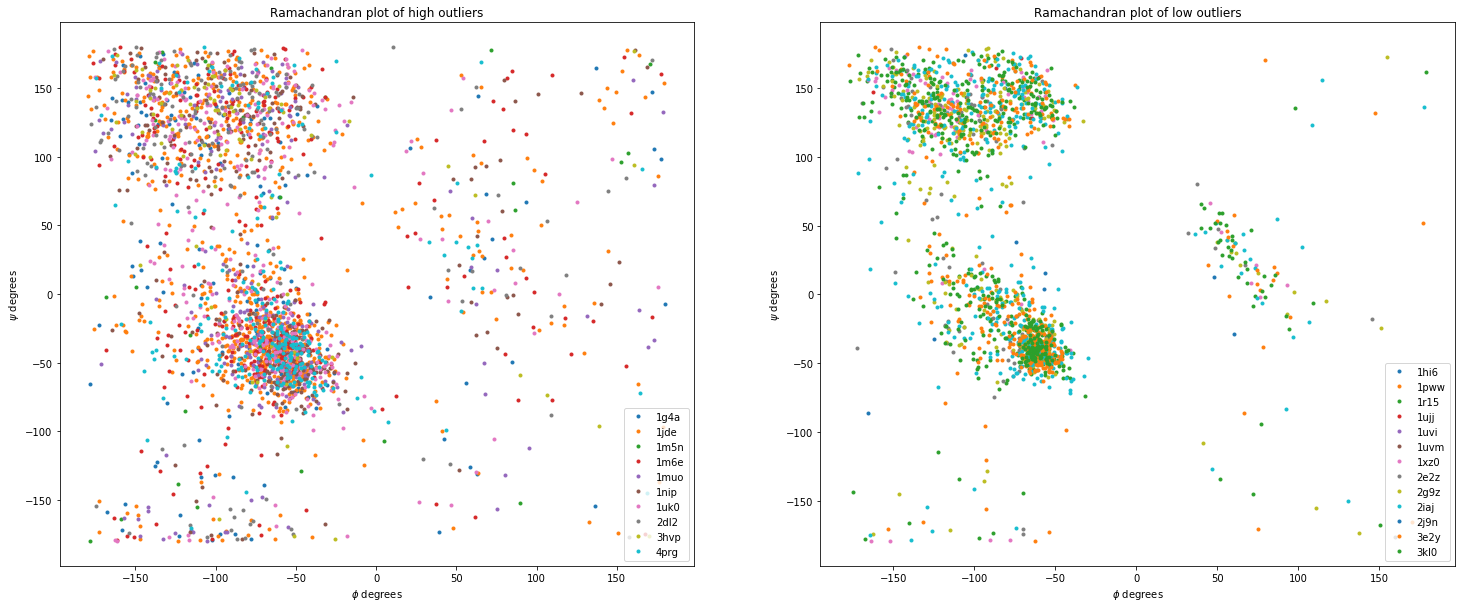

In [14]:
%matplotlib inline
fig=plt.figure(figsize=(25,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

highoutliers=os.listdir(os.chdir('/Users/ndnguyen20/Box/ndnguyen20/CHE471 SciComputing/CHE471_SciComp_Project_Nhan Nguyen/PDB High Outlier'))
for file in highoutliers:
    if file.endswith('pdb'):
        protein=os.path.basename(file)
        data=ramachandran(protein)
        ax1.plot(data['phi'],data['psi'],'.',label=protein[:-4])
    ax1.legend(loc=4)
    ax1.set_title('Ramachandran plot of high outliers')
    ax1.set_xlabel('$\phi$ degrees')
    ax1.set_ylabel('$\psi$ degrees')
    
    
lowoutliers=os.listdir(os.chdir('/Users/ndnguyen20/Box/ndnguyen20/CHE471 SciComputing/CHE471_SciComp_Project_Nhan Nguyen/PDB Low Outlier'))
for file in lowoutliers:
    if file.endswith('pdb'):
        protein=os.path.basename(file)
        data=ramachandran(protein)
        ax2.plot(data['phi'],data['psi'],'.',label=protein[:-4])
    ax2.legend(loc=4)
    ax2.set_title('Ramachandran plot of low outliers')
    ax2.set_xlabel('$\phi$ degrees')
    ax2.set_ylabel('$\psi$ degrees')
    
os.chdir('/Users/ndnguyen20/Box/ndnguyen20/CHE471 SciComputing/CHE471_SciComp_Project_Nhan Nguyen')
plt.savefig('Ramachandran results.jpg')


## <font color = 'blue'>Visualizing proteins </font>

### <font color = 'red'> A. Background </font>
In this application, I will visualize atoms of my protein GCN4, which is commonly called Leucine Zipper, in my research last summer. 

**Figure 3:** Leucine Zipper's back bone from Protein Data Bank (www.rcsb.org)
<img src="GCN4.png" alt="Drawing" style="width: 500px;"/>

### <font color = 'red'> B. Procedure </font>
Each atom in GCN4 will be a dot in three dimension coordinates. In **BioPython**, it has a *<u> PDBParser</u>* module to read the atoms or specific chains. The *<u>for</u>* loop will subsequently opens different layers of the model: 

`chain > residue > atom`

The plot will be shown in a new window.

In [15]:
os.chdir('/Users/ndnguyen20/Box/ndnguyen20/CHE471 SciComputing/CHE471_SciComp_Project_Nhan Nguyen/')

In [16]:
from Bio.PDB import PDBParser
model = PDBParser().get_structure("GCN4","GCN4.pdb")                    
x=[]
y=[]
z=[]
for chains in model:
    for chain in chains:
        for residue in chain:                             
            for atom in residue:
                print(atom.get_vector())
                x.append(atom.get_vector()[0])
                y.append(atom.get_vector()[1])
                z.append(atom.get_vector()[2])

<Vector 5.93, 17.01, -4.43>
<Vector 5.92, 15.70, -5.07>
<Vector 5.28, 14.64, -4.19>
<Vector 5.42, 14.66, -2.96>
<Vector 7.34, 15.28, -5.44>
<Vector 8.00, 16.15, -6.50>
<Vector 9.40, 15.65, -6.84>
<Vector 10.06, 16.52, -7.90>
<Vector 11.43, 16.05, -8.23>
<Vector 4.60, 13.69, -4.84>
<Vector 3.92, 12.59, -4.16>
<Vector 4.91, 11.72, -3.41>
<Vector 4.60, 11.23, -2.32>
<Vector 3.13, 11.76, -5.15>
<Vector 6.09, 11.52, -3.97>
<Vector 7.11, 10.70, -3.34>
<Vector 7.62, 11.35, -2.07>
<Vector 7.92, 10.66, -1.10>
<Vector 8.28, 10.47, -4.30>
<Vector 7.95, 9.58, -5.49>
<Vector 7.56, 8.18, -5.09>
<Vector 8.38, 7.49, -4.53>
<Vector 6.44, 7.80, -5.34>
<Vector 7.68, 12.68, -2.06>
<Vector 8.09, 13.39, -0.86>
<Vector 7.02, 13.24, 0.20>
<Vector 7.34, 13.06, 1.38>
<Vector 8.33, 14.86, -1.15>
<Vector 9.56, 15.16, -2.00>
<Vector 9.69, 16.61, -2.28>
<Vector 10.87, 16.89, -3.09>
<Vector 11.17, 18.10, -3.60>
<Vector 10.37, 19.13, -3.38>
<Vector 12.26, 18.26, -4.33>
<Vector 5.75, 13.27, -0.22>
<Vector 4.64, 13.06,

<Vector -10.22, -10.49, 7.69>
<Vector -9.44, -11.37, 9.90>
<Vector -10.70, -11.79, 7.08>
<Vector -6.25, -10.01, 9.76>
<Vector -5.18, -10.23, 10.72>
<Vector -4.68, -8.91, 11.29>
<Vector -4.40, -8.82, 12.49>
<Vector -4.03, -10.99, 10.08>
<Vector -4.58, -7.89, 10.44>
<Vector -4.13, -6.57, 10.86>
<Vector -5.08, -5.97, 11.88>
<Vector -4.64, -5.40, 12.87>
<Vector -4.00, -5.65, 9.65>
<Vector -6.39, -6.11, 11.65>
<Vector -7.35, -5.56, 12.59>
<Vector -7.32, -6.31, 13.91>
<Vector -7.48, -5.70, 14.97>
<Vector -8.75, -5.60, 12.01>
<Vector -9.18, -6.93, 11.84>
<Vector -7.03, -7.61, 13.85>
<Vector -6.91, -8.41, 15.07>
<Vector -5.70, -7.97, 15.87>
<Vector -5.78, -7.86, 17.09>
<Vector -6.82, -9.90, 14.73>
<Vector -8.11, -10.50, 14.20>
<Vector -7.94, -11.98, 13.88>
<Vector -9.22, -12.59, 13.34>
<Vector -9.06, -14.02, 12.99>
<Vector -4.59, -7.71, 15.17>
<Vector -3.37, -7.24, 15.81>
<Vector -3.62, -5.94, 16.54>
<Vector -3.21, -5.78, 17.69>
<Vector -2.27, -7.07, 14.78>
<Vector -1.09, -6.61, 15.38>
<Vector

Using matplotlib backend: MacOSX


'When rotating the 3-D model, we can clearly see 2 alpha helices twist around each other as they are in figure 3'

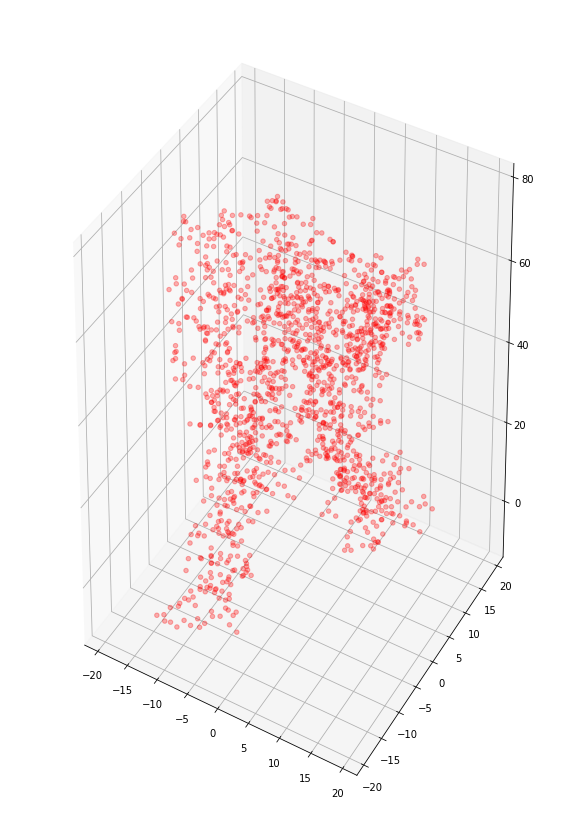

In [17]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
fig=plt.figure(figsize=(10,15))
ax1=fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(x,y,z,c='red',alpha=0.3)
'''When rotating the 3-D model, we can clearly see 2 alpha helices twist around each other as they are in figure 3'''

## <font color = 'blue'>Acknowledgement </font>
I thank Dr. Charles Weiss for providing me the codes and giving me suggestions to improve my plots. I thank Dr. Walter Novak for showing me dihedral angles from his models. I thank the CHE 471 class for helping during the Fall term of 2017 to finish the project. 

## <font color = 'blue'>References </font>
(1) Halkides, C. J. (2013). Using Molecular Models To Show Steric Clash in Peptides: An Illustration of Two Disallowed Regions in the Ramachandran Diagram. *Journal of Chemical Education, 90(6)*, 760-762. doi:10.1021/ed3001528

(2) Novak,W., West, K.,H.,J. (2016). Ramachandran outliers in ligand-induced protein structural changes. Poster. *Department of Chemistry, Wabash College, IN 47933.* 

(3) Numazawa, A. Dihedral Angle Calculation. Retrieved November 20, 2017, from http://cib.cf.ocha.ac.jp/bitool/DIHED2/

(4) Shinwari, J. , Tahir, A. , Bohlega, S. and AlTassan, N. (2013). In silico analysis of influence of the missense mutation P629S on the molecular interaction and 3D properties of PIK3R5. *Advances in Biological Chemistry, 3*, 408-417. doi:10.4236/abc.2013.34044.

(5) Weiss, C.(2016). Analysis of Protein Rotation/Refinement Data. Jupyter Notebook. *Department of Chemistry, Wabash College, IN 47933.*


